# Programming with Python

Tutors: Drazen Petrov (drazen.petrov@boku.ac.at) & Yerko Escalona (yerko.escalona@boku.ac.at)

## Lecture 7

Overview:
#### Pandas

- introduction
- indexing, slicing, attribute access
- assigning values
- conditional accessing data
- time functionality
- concatenate / merge / join
- groupby

#### Matplotlib
- plotting using pandas


<br>
useful links:

https://pandas.pydata.org/ <br>
https://pandas.pydata.org/docs/user_guide/index.html#user-guide 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Lists and Numpy indexing and limitations

In [2]:
data = [['Austria',  8902600, 'Vienna'],
['Germany', 83149300, 'Berlin'],
['Croatia',  4076246, 'Zagreb'],
['Chile', 17574003, 'Santiago']]
data

[['Austria', 8902600, 'Vienna'],
 ['Germany', 83149300, 'Berlin'],
 ['Croatia', 4076246, 'Zagreb'],
 ['Chile', 17574003, 'Santiago']]

In [3]:
data[1][0] # second row, country name

'Germany'

In [4]:
np_data = np.array(data)
np_data # everything string

array([['Austria', '8902600', 'Vienna'],
       ['Germany', '83149300', 'Berlin'],
       ['Croatia', '4076246', 'Zagreb'],
       ['Chile', '17574003', 'Santiago']], dtype='<U11')

In [5]:
np_data[:,1].astype(int) # one could convert it

array([ 8902600, 83149300,  4076246, 17574003])

In [6]:
%%writefile population.csv
country,population,capital
Austria,8902600,Vienna
Germany,83149300,Berlin
Croatia,4076246,Zagreb
Chile,17574003,Santiago

Overwriting population.csv


### advanced numpy indexing

In [7]:
import numpy as np
# more advanced way of defining which data types should be used
dt = np.dtype([("country", "S20"), ("population", "i4"), ("capital", "S20") ])
data = np.loadtxt("population.csv", skiprows=1, delimiter=",", dtype=dt)
data

array([(b'Austria',  8902600, b'Vienna'),
       (b'Germany', 83149300, b'Berlin'),
       (b'Croatia',  4076246, b'Zagreb'),
       (b'Chile', 17574003, b'Santiago')],
      dtype=[('country', 'S20'), ('population', '<i4'), ('capital', 'S20')])

In [8]:
data[0] # first row

(b'Austria', 8902600, b'Vienna')

In [9]:
data["country"]

array([b'Austria', b'Germany', b'Croatia', b'Chile'], dtype='|S20')

In [10]:
data["population"]

array([ 8902600, 83149300,  4076246, 17574003])

You can access the columns, but if you want to ask for the population in a certain country.

In [11]:
data["population"][data["country"] == b"Croatia"]

array([4076246])

The code is getting ugly.

## Pandas

"pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language."<br>
https://pandas.pydata.org/

### basics

In [12]:
import pandas as pd

In [13]:
data_list = [['Austria',  8902600, 'Vienna'],
['Germany', 83149300, 'Berlin'],
['Croatia',  4076246, 'Zagreb'],
['Chile', 17574003, 'Santiago']]
# generating from data
data = pd.DataFrame(data_list, columns = ['country', 'population', 'capital'])
data

country  population   capital
0  Austria     8902600    Vienna
1  Germany    83149300    Berlin
2  Croatia     4076246    Zagreb
3    Chile    17574003  Santiago

In [14]:
data = pd.read_csv("population.csv", delimiter=",") # or reading from a file
data

country  population   capital
0  Austria     8902600    Vienna
1  Germany    83149300    Berlin
2  Croatia     4076246    Zagreb
3    Chile    17574003  Santiago

In [15]:
data.set_index('country') # set index

population   capital
country                      
Austria     8902600    Vienna
Germany    83149300    Berlin
Croatia     4076246    Zagreb
Chile      17574003  Santiago

In [16]:
data = pd.read_csv("population.csv", delimiter=",", index_col=0) # set the index immediately
data

population   capital
country                      
Austria     8902600    Vienna
Germany    83149300    Berlin
Croatia     4076246    Zagreb
Chile      17574003  Santiago

In [17]:
data.shape

(4, 2)

In [18]:
data.head(2) # show first 2 rows, first 5 by default
#data.tail(3) # show last 3 rows, last 5 by default

population capital
country                    
Austria     8902600  Vienna
Germany    83149300  Berlin

In [19]:
print("columns\t", data.columns)
print("keys\t", data.keys()) # basically same as columns (pandas is based on dictionaries)
print("index\t", data.index)

columns	 Index(['population', 'capital'], dtype='object')
keys	 Index(['population', 'capital'], dtype='object')
index	 Index(['Austria', 'Germany', 'Croatia', 'Chile'], dtype='object', name='country')


### indexing, slicing, attribute access

In [20]:
# dictionary style
data["population"] # indexing first columns!

country
Austria     8902600
Germany    83149300
Croatia     4076246
Chile      17574003
Name: population, dtype: int64

In [21]:
# object
data.population

country
Austria     8902600
Germany    83149300
Croatia     4076246
Chile      17574003
Name: population, dtype: int64

In [22]:
data["population"]["Austria"]

8902600

In [23]:
data.population.Austria

8902600

In [24]:
# indexing with loc
data.loc['Germany'] # indexing first rows!

population    83149300
capital         Berlin
Name: Germany, dtype: object

In [25]:
data.loc['Germany', 'capital']

'Berlin'

In [26]:
data.loc['Germany',:]

population    83149300
capital         Berlin
Name: Germany, dtype: object

In [27]:
data.loc[['Croatia', 'Chile'], 'capital']

country
Croatia      Zagreb
Chile      Santiago
Name: capital, dtype: object

In [28]:
# indexing with iloc
data.iloc[1] # second row

population    83149300
capital         Berlin
Name: Germany, dtype: object

In [29]:
data.iloc[1:,1] # all rows from the second, second column

country
Germany      Berlin
Croatia      Zagreb
Chile      Santiago
Name: capital, dtype: object

In [30]:
data.iloc[0:2 , [0,1]]

population capital
country                    
Austria     8902600  Vienna
Germany    83149300  Berlin

In [31]:
data[:2]

population capital
country                    
Austria     8902600  Vienna
Germany    83149300  Berlin

### assigning values

In [32]:
data_orig = data.copy() # copy the original data
df = data
df

population   capital
country                      
Austria     8902600    Vienna
Germany    83149300    Berlin
Croatia     4076246    Zagreb
Chile      17574003  Santiago

In [33]:
print(df.iloc[0,0])
df.iloc[0,0] = 10000000
#df.loc['Austria', 'population'] = 10000000
#df['population']["Austria"] = 10000000
print(df.iloc[0,0])
df

8902600
10000000


population   capital
country                      
Austria    10000000    Vienna
Germany    83149300    Berlin
Croatia     4076246    Zagreb
Chile      17574003  Santiago

In [34]:
data # this also got modified

population   capital
country                      
Austria    10000000    Vienna
Germany    83149300    Berlin
Croatia     4076246    Zagreb
Chile      17574003  Santiago

In [35]:
data_orig # still having the original data

population   capital
country                      
Austria     8902600    Vienna
Germany    83149300    Berlin
Croatia     4076246    Zagreb
Chile      17574003  Santiago

In [36]:
df.loc['Chile', 'capital'] = 'Valparaiso' 
# same as df.iloc[3,1] = 'Valparaiso' 
# same as df['capital'][3] = 'Valparaiso'
# same as df['capital']['Chile'] = 'Valparaiso'
# same as df.capital.Chile = 'Valparaiso' 
df['capital']['Chile']

'Valparaiso'

In [37]:
df.loc["Croatia"]

population    4076246
capital        Zagreb
Name: Croatia, dtype: object

In [38]:
df.loc['Croatia'] = [5000000, 'Split'] # set values for the whole row
df

population     capital
country                        
Austria    10000000      Vienna
Germany    83149300      Berlin
Croatia     5000000       Split
Chile      17574003  Valparaiso

In [39]:
df.population = 200 # set values for the whole column
df

population     capital
country                        
Austria         200      Vienna
Germany         200      Berlin
Croatia         200       Split
Chile           200  Valparaiso

In [40]:
# generate a new column
df['newcol'] = 'a'
# df.newcol = 100 this does not work!
df

population     capital newcol
country                               
Austria         200      Vienna      a
Germany         200      Berlin      a
Croatia         200       Split      a
Chile           200  Valparaiso      a

In [41]:
# generate a new column
df['newcol2'] = [1, 2, 3, 4]
df

population     capital newcol  newcol2
country                                        
Austria         200      Vienna      a        1
Germany         200      Berlin      a        2
Croatia         200       Split      a        3
Chile           200  Valparaiso      a        4

In [42]:
df['newcol3'] = df.population / df.newcol2
df

population     capital newcol  newcol2     newcol3
country                                                    
Austria         200      Vienna      a        1  200.000000
Germany         200      Berlin      a        2  100.000000
Croatia         200       Split      a        3   66.666667
Chile           200  Valparaiso      a        4   50.000000

In [43]:
data

population     capital newcol  newcol2     newcol3
country                                                    
Austria         200      Vienna      a        1  200.000000
Germany         200      Berlin      a        2  100.000000
Croatia         200       Split      a        3   66.666667
Chile           200  Valparaiso      a        4   50.000000

In [44]:
data_orig

population   capital
country                      
Austria     8902600    Vienna
Germany    83149300    Berlin
Croatia     4076246    Zagreb
Chile      17574003  Santiago

### some simple operations

In [45]:
df = data_orig.copy()

In [46]:
df.mean()

population    28425537.25
dtype: float64

In [47]:
df.min()

population    4076246
capital        Berlin
dtype: object

In [48]:
df.max()

population    83149300
capital         Zagreb
dtype: object

In [49]:
df.median()

population    13238301.5
dtype: float64

In [50]:
df.describe() # very useful!

population
count  4.000000e+00
mean   2.842554e+07
std    3.690745e+07
min    4.076246e+06
25%    7.696012e+06
50%    1.323830e+07
75%    3.396783e+07
max    8.314930e+07

In [51]:
df.sort_values('population')

population   capital
country                      
Croatia     4076246    Zagreb
Austria     8902600    Vienna
Chile      17574003  Santiago
Germany    83149300    Berlin

In [52]:
df.sort_values('population', ascending = False)

population   capital
country                      
Germany    83149300    Berlin
Chile      17574003  Santiago
Austria     8902600    Vienna
Croatia     4076246    Zagreb

In [53]:
df.drop(['Germany', 'Chile', 'Croatia'])

population capital
country                    
Austria     8902600  Vienna

In [54]:
df.drop('capital', axis = 1)

population
country            
Austria     8902600
Germany    83149300
Croatia     4076246
Chile      17574003

### conditional accessing the data

In [55]:
%%writefile country_data_2.csv
country,population,capital,flag_col,size_km2,islands
Austria,8902600,Vienna,2,83879,0
Germany,83149300,Berlin,3,357386,50
Croatia,4076246,Zagreb,3,56594,718
Chile,17574003,Santiago,3,756950,134

Overwriting country_data_2.csv


In [56]:
df_coutry = pd.read_csv("country_data_2.csv", delimiter=",", index_col=0)
df = df_coutry.copy()
df

population   capital  flag_col  size_km2  islands
country                                                   
Austria     8902600    Vienna         2     83879        0
Germany    83149300    Berlin         3    357386       50
Croatia     4076246    Zagreb         3     56594      718
Chile      17574003  Santiago         3    756950      134

In [57]:
df.population>5000000

country
Austria     True
Germany     True
Croatia    False
Chile       True
Name: population, dtype: bool

In [58]:
df[df.population>5000000] # similar to numpy behaviour

population   capital  flag_col  size_km2  islands
country                                                   
Austria     8902600    Vienna         2     83879        0
Germany    83149300    Berlin         3    357386       50
Chile      17574003  Santiago         3    756950      134

In [59]:
df[df.flag_col.isin([2])]

population capital  flag_col  size_km2  islands
country                                                 
Austria     8902600  Vienna         2     83879        0

In [60]:
df[(df.population>5000000) & (df.islands > 0) & (df.flag_col.isin([3]))] # and

population   capital  flag_col  size_km2  islands
country                                                   
Germany    83149300    Berlin         3    357386       50
Chile      17574003  Santiago         3    756950      134

In [61]:
df[(df.population>10000000) | (df.islands == 0)] # or

population   capital  flag_col  size_km2  islands
country                                                   
Austria     8902600    Vienna         2     83879        0
Germany    83149300    Berlin         3    357386       50
Chile      17574003  Santiago         3    756950      134

In [62]:
df[~((df.population>10000000) | (df.islands == 0))] # ~ is logical not (the opposite from above)

population capital  flag_col  size_km2  islands
country                                                 
Croatia     4076246  Zagreb         3     56594      718

In [63]:
df.query('population > 10000000')
#df.query('population > 10000000 and islands  > 100') # some additional examples
#df.query('not(population > 10000000 and islands  > 100)') # some additional examples

population   capital  flag_col  size_km2  islands
country                                                   
Germany    83149300    Berlin         3    357386       50
Chile      17574003  Santiago         3    756950      134

### concat, merge, join


In [64]:
df_europe = df.iloc[:3]
df_europe

population capital  flag_col  size_km2  islands
country                                                 
Austria     8902600  Vienna         2     83879        0
Germany    83149300  Berlin         3    357386       50
Croatia     4076246  Zagreb         3     56594      718

In [65]:
df_SA = df.iloc[3:]
df_SA

population   capital  flag_col  size_km2  islands
country                                                   
Chile      17574003  Santiago         3    756950      134

In [66]:
pd.concat([df_europe, df_SA]) # concatenate rows

population   capital  flag_col  size_km2  islands
country                                                   
Austria     8902600    Vienna         2     83879        0
Germany    83149300    Berlin         3    357386       50
Croatia     4076246    Zagreb         3     56594      718
Chile      17574003  Santiago         3    756950      134

In [67]:
df_data1 = df.iloc[:,:2]
df_data1

population   capital
country                      
Austria     8902600    Vienna
Germany    83149300    Berlin
Croatia     4076246    Zagreb
Chile      17574003  Santiago

In [68]:
df_data2 = df.iloc[:,2:]
df_data2

flag_col  size_km2  islands
country                             
Austria         2     83879        0
Germany         3    357386       50
Croatia         3     56594      718
Chile           3    756950      134

In [69]:
pd.concat([df_data1, df_data2], axis = 1) # concatenate columns

population   capital  flag_col  size_km2  islands
country                                                   
Austria     8902600    Vienna         2     83879        0
Germany    83149300    Berlin         3    357386       50
Croatia     4076246    Zagreb         3     56594      718
Chile      17574003  Santiago         3    756950      134

### merge (join)

In [70]:
df_data1.reset_index(inplace=True)
df_data1

country  population   capital
0  Austria     8902600    Vienna
1  Germany    83149300    Berlin
2  Croatia     4076246    Zagreb
3    Chile    17574003  Santiago

In [71]:
df_data2 = df_data2[::-1].reset_index()
df_data2

country  flag_col  size_km2  islands
0    Chile         3    756950      134
1  Croatia         3     56594      718
2  Germany         3    357386       50
3  Austria         2     83879        0

In [72]:
pd.concat([df_data1, df_data2], axis = 1) # not what we wanted...

country  population   capital  country  flag_col  size_km2  islands
0  Austria     8902600    Vienna    Chile         3    756950      134
1  Germany    83149300    Berlin  Croatia         3     56594      718
2  Croatia     4076246    Zagreb  Germany         3    357386       50
3    Chile    17574003  Santiago  Austria         2     83879        0

In [73]:
pd.merge(df_data1, df_data2, on='country') # better :)
#pd.merge(df_data1, df_data2, left_on='country', right_on='country') # if column names are not the same

country  population   capital  flag_col  size_km2  islands
0  Austria     8902600    Vienna         2     83879        0
1  Germany    83149300    Berlin         3    357386       50
2  Croatia     4076246    Zagreb         3     56594      718
3    Chile    17574003  Santiago         3    756950      134

### missing data

In [74]:
%%writefile country_data_missing.csv
country,population,capital,flag_col,size_km2,islands
Austria,8902600,Vienna,2,83879,0
Germany,,Berlin,3,357386,50
Croatia,4076246,Zagreb,,56594,718
Chile,17574003,Santiago,3,756950,134

Overwriting country_data_missing.csv


In [75]:
df_coutry = pd.read_csv("country_data_missing.csv", delimiter=",", index_col=0)
df = df_coutry.copy()
df

population   capital  flag_col  size_km2  islands
country                                                   
Austria   8902600.0    Vienna       2.0     83879        0
Germany         NaN    Berlin       3.0    357386       50
Croatia   4076246.0    Zagreb       NaN     56594      718
Chile    17574003.0  Santiago       3.0    756950      134

In [76]:
df.isna()

population  capital  flag_col  size_km2  islands
country                                                  
Austria       False    False     False     False    False
Germany        True    False     False     False    False
Croatia       False    False      True     False    False
Chile         False    False     False     False    False

In [77]:
df.notna()

population  capital  flag_col  size_km2  islands
country                                                  
Austria        True     True      True      True     True
Germany       False     True      True      True     True
Croatia        True     True     False      True     True
Chile          True     True      True      True     True

In [78]:
df.dropna()

population   capital  flag_col  size_km2  islands
country                                                   
Austria   8902600.0    Vienna       2.0     83879        0
Chile    17574003.0  Santiago       3.0    756950      134

#### other way of getting NaN

In [79]:
df_coutry = pd.read_csv("country_data_2.csv", delimiter=",", index_col=0)
df = df_coutry.copy()
df

population   capital  flag_col  size_km2  islands
country                                                   
Austria     8902600    Vienna         2     83879        0
Germany    83149300    Berlin         3    357386       50
Croatia     4076246    Zagreb         3     56594      718
Chile      17574003  Santiago         3    756950      134

In [80]:
df_islands = df[['islands']].iloc[1:,:] # only countries with islands...
df_islands

islands
country         
Germany       50
Croatia      718
Chile        134

In [81]:
df.iloc[:,:-1] # this is all data without inslands

population   capital  flag_col  size_km2
country                                          
Austria     8902600    Vienna         2     83879
Germany    83149300    Berlin         3    357386
Croatia     4076246    Zagreb         3     56594
Chile      17574003  Santiago         3    756950

In [82]:
# if we merge these 2
df_new = pd.merge(df.iloc[:,:-1], df_islands, on='country', how='left') # how = 'left', 'right', 'inner', 'outer'
df_new

population   capital  flag_col  size_km2  islands
country                                                   
Austria     8902600    Vienna         2     83879      NaN
Germany    83149300    Berlin         3    357386     50.0
Croatia     4076246    Zagreb         3     56594    718.0
Chile      17574003  Santiago         3    756950    134.0

In [83]:
df_new.fillna(0) # fill the NaN with a specific value

population   capital  flag_col  size_km2  islands
country                                                   
Austria     8902600    Vienna         2     83879      0.0
Germany    83149300    Berlin         3    357386     50.0
Croatia     4076246    Zagreb         3     56594    718.0
Chile      17574003  Santiago         3    756950    134.0

### groupby

In [84]:
continents = ['Europe'] * 3
continents.append('SAmerica')
df['continent'] = continents
df

population   capital  flag_col  size_km2  islands continent
country                                                             
Austria     8902600    Vienna         2     83879        0    Europe
Germany    83149300    Berlin         3    357386       50    Europe
Croatia     4076246    Zagreb         3     56594      718    Europe
Chile      17574003  Santiago         3    756950      134  SAmerica

In [85]:
df.groupby('continent')

In [86]:
df.groupby('continent').mean()

population  flag_col  size_km2  islands
continent                                           
Europe     3.204272e+07  2.666667  165953.0    256.0
SAmerica   1.757400e+07  3.000000  756950.0    134.0

In [87]:
df.groupby('continent').std() # min, max, median, ...

population  flag_col       size_km2     islands
continent                                                   
Europe     4.432534e+07   0.57735  166346.214033  400.884023
SAmerica            NaN       NaN            NaN         NaN

In [88]:
df.groupby('continent').agg(['min', 'max', 'sum']) # more funcntions at once (aggregate)

population                       capital            \
                 min       max       sum       min       max   
continent                                                      
Europe       4076246  83149300  96128146    Berlin    Zagreb   
SAmerica    17574003  17574003  17574003  Santiago  Santiago   

                              flag_col         size_km2                  \
                          sum      min max sum      min     max     sum   
continent                                                                 
Europe     ViennaBerlinZagreb        2   3   8    56594  357386  497859   
SAmerica             Santiago        3   3   3   756950  756950  756950   

          islands            
              min  max  sum  
continent                    
Europe          0  718  768  
SAmerica      134  134  134

### time series and time data functionality

In [89]:
import pandas as pd
import numpy as np
import datetime
pd.to_datetime(['1/1/2018', np.datetime64('2018-01-01'),datetime.datetime(2018, 1, 1)]) # generate date

DatetimeIndex(['2018-01-01', '2018-01-01', '2018-01-01'], dtype='datetime64[ns]', freq=None)

In [90]:
pd.date_range('2018-01-01', periods=3, freq='D')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq='D')

In [91]:
pd.Timestamp('2018-01-05') # another way to generate a date

Timestamp('2018-01-05 00:00:00')

In [92]:
pd.to_datetime('2010/11/12', format='%Y/%m/%d') # define specific date format

Timestamp('2010-11-12 00:00:00')

In [93]:
today = pd.Timestamp('2021-05-18')
today.day_name()

'Tuesday'

In [94]:
tomorrow = today + pd.Timedelta('1 day')
tomorrow.day_name()

'Wednesday'

In [95]:
for i in range(1,5):
    next_bussines_day = today + pd.offsets.BDay() * i # get business days
    print(next_bussines_day.day_name())


Wednesday
Thursday
Friday
Monday


In [96]:
np.random.seed(0)
N_data_points = 100
dft = pd.DataFrame(np.random.rand(N_data_points), columns=['some random data'],
                   index=pd.date_range('20130101', periods=N_data_points, freq='D')) # days

In [97]:
dft

some random data
2013-01-01          0.548814
2013-01-02          0.715189
2013-01-03          0.602763
2013-01-04          0.544883
2013-01-05          0.423655
...                      ...
2013-04-06          0.183191
2013-04-07          0.586513
2013-04-08          0.020108
2013-04-09          0.828940
2013-04-10          0.004695

[100 rows x 1 columns]

In [98]:
dft.loc['2013']# all dates from 2013 (same as all data)

some random data
2013-01-01          0.548814
2013-01-02          0.715189
2013-01-03          0.602763
2013-01-04          0.544883
2013-01-05          0.423655
...                      ...
2013-04-06          0.183191
2013-04-07          0.586513
2013-04-08          0.020108
2013-04-09          0.828940
2013-04-10          0.004695

[100 rows x 1 columns]

In [99]:
dft['2013-1':'2013-3'] # January to March

some random data
2013-01-01          0.548814
2013-01-02          0.715189
2013-01-03          0.602763
2013-01-04          0.544883
2013-01-05          0.423655
...                      ...
2013-03-27          0.265389
2013-03-28          0.523248
2013-03-29          0.093941
2013-03-30          0.575946
2013-03-31          0.929296

[90 rows x 1 columns]

In [100]:
dft.resample('M').sum() # takes all available data for each month and sums it

some random data
2013-01-31         17.698165
2013-02-28         13.042204
2013-03-31         12.792056
2013-04-30          3.746958

In [101]:
dft.rolling(5).mean() # rolling average over 5 days

some random data
2013-01-01               NaN
2013-01-02               NaN
2013-01-03               NaN
2013-01-04               NaN
2013-01-05          0.567061
...                      ...
2013-04-06          0.397627
2013-04-07          0.381447
2013-04-08          0.359109
2013-04-09          0.381632
2013-04-10          0.324689

[100 rows x 1 columns]

# BREAK

## manipulating, looking, summarizing and plotting the data

#### STEP I: clean the data and prepare the dataframe

In [102]:
covid_df = pd.read_csv('data/CovidFaelle_Timeline.csv', sep=';')
covid_df

Time        Bundesland  BundeslandID  AnzEinwohner  \
0     26.02.2020 00:00:00        Burgenland             1        294436   
1     26.02.2020 00:00:00           Kärnten             2        561293   
2     26.02.2020 00:00:00  Niederösterreich             3       1684287   
3     26.02.2020 00:00:00    Oberösterreich             4       1490279   
4     26.02.2020 00:00:00          Salzburg             5        558410   
...                   ...               ...           ...           ...   
2615  13.11.2020 00:00:00        Steiermark             6       1246395   
2616  13.11.2020 00:00:00             Tirol             7        757634   
2617  13.11.2020 00:00:00        Vorarlberg             8        397139   
2618  13.11.2020 00:00:00              Wien             9       1911191   
2619  13.11.2020 00:00:00        Österreich            10       8901064   

      AnzahlFaelle  AnzahlFaelleSum  AnzahlFaelle7Tage  \
0                0                0                  0   
1                0                0                  0   
2                0                0                  0   
3                0                0                  0   
4                0                0                  0   
...            ...              ...                ...   
2615           951            20919               6081   
2616           505            23329               4992   
2617           353            11576               3244   
2618           843            47242               7975   
2619          6341           198216              48408   

     SiebenTageInzidenzFaelle  AnzahlTotTaeglich  AnzahlTotSum  \
0                           0                  0             0   
1                           0                  0             0   
2                           0                  0             0   
3                           0                  0             0   
4                           0                  0             0   
...                       ...                ...           ...   
2615                 487,8871                 12           316   
2616                 658,8934                  1           176   
2617                 816,8425                  4            66   
2618                 417,2791                  4           452   
2619                 543,8451                 36          1629   

      AnzahlGeheiltTaeglich  AnzahlGeheiltSum  
0                         0                 0  
1                         0                 0  
2                         0                 0  
3                         0                 0  
4                         0                 0  
...                     ...               ...  
2615                    324              8688  
2616                    322             15124  
2617                    276              6737  
2618                      7             16396  
2619                   2167             90094  

[2620 rows x 12 columns]

In [103]:
covid_df.head()

Time        Bundesland  BundeslandID  AnzEinwohner  \
0  26.02.2020 00:00:00        Burgenland             1        294436   
1  26.02.2020 00:00:00           Kärnten             2        561293   
2  26.02.2020 00:00:00  Niederösterreich             3       1684287   
3  26.02.2020 00:00:00    Oberösterreich             4       1490279   
4  26.02.2020 00:00:00          Salzburg             5        558410   

   AnzahlFaelle  AnzahlFaelleSum  AnzahlFaelle7Tage SiebenTageInzidenzFaelle  \
0             0                0                  0                        0   
1             0                0                  0                        0   
2             0                0                  0                        0   
3             0                0                  0                        0   
4             0                0                  0                        0   

   AnzahlTotTaeglich  AnzahlTotSum  AnzahlGeheiltTaeglich  AnzahlGeheiltSum  
0                  0             0                      0                 0  
1                  0             0                      0                 0  
2                  0             0                      0                 0  
3                  0             0                      0                 0  
4                  0             0                      0                 0

In [104]:
covid_df.columns

Index(['Time', 'Bundesland', 'BundeslandID', 'AnzEinwohner', 'AnzahlFaelle',
       'AnzahlFaelleSum', 'AnzahlFaelle7Tage', 'SiebenTageInzidenzFaelle',
       'AnzahlTotTaeglich', 'AnzahlTotSum', 'AnzahlGeheiltTaeglich',
       'AnzahlGeheiltSum'],
      dtype='object')

#### filter out data for the whole country

In [105]:
covid_Austria_df = covid_df[covid_df.BundeslandID == 10].copy()
covid_Austria_df

Time  Bundesland  BundeslandID  AnzEinwohner  \
9     26.02.2020 00:00:00  Österreich            10       8901064   
19    27.02.2020 00:00:00  Österreich            10       8901064   
29    28.02.2020 00:00:00  Österreich            10       8901064   
39    29.02.2020 00:00:00  Österreich            10       8901064   
49    01.03.2020 00:00:00  Österreich            10       8901064   
...                   ...         ...           ...           ...   
2579  09.11.2020 00:00:00  Österreich            10       8901064   
2589  10.11.2020 00:00:00  Österreich            10       8901064   
2599  11.11.2020 00:00:00  Österreich            10       8901064   
2609  12.11.2020 00:00:00  Österreich            10       8901064   
2619  13.11.2020 00:00:00  Österreich            10       8901064   

      AnzahlFaelle  AnzahlFaelleSum  AnzahlFaelle7Tage  \
9                1                1                  1   
19               2                3                  3   
29               4                7                  7   
39               1                8                  8   
49               4               12                 12   
...            ...              ...                ...   
2579          6148           167014              45734   
2589          7476           174490              46847   
2599          9261           183751              48987   
2609          8124           191875              50167   
2619          6341           198216              48408   

     SiebenTageInzidenzFaelle  AnzahlTotTaeglich  AnzahlTotSum  \
9                  0,01123461                  0             0   
19                 0,03370384                  0             0   
29                 0,07864229                  0             0   
39                  0,0898769                  0             0   
49                  0,1348154                  0             0   
...                       ...                ...           ...   
2579                 513,8038                 41          1486   
2589                 526,3079                 40          1526   
2599                 550,3499                 28          1554   
2609                 563,6068                 39          1593   
2619                 543,8451                 36          1629   

      AnzahlGeheiltTaeglich  AnzahlGeheiltSum  
9                         0                 0  
19                        0                 0  
29                        0                 0  
39                        0                 0  
49                        0                 0  
...                     ...               ...  
2579                   2623             80468  
2589                   2453             82921  
2599                   2485             85406  
2609                   2521             87927  
2619                   2167             90094  

[262 rows x 12 columns]

In [106]:
# convert Time column into timestamp and set it as index
covid_Austria_df.Time = pd.to_datetime(covid_Austria_df.Time, yearfirst = True, dayfirst = True)
covid_Austria_df = covid_Austria_df.set_index('Time')
covid_Austria_df.head()

Bundesland  BundeslandID  AnzEinwohner  AnzahlFaelle  \
Time                                                               
2020-02-26  Österreich            10       8901064             1   
2020-02-27  Österreich            10       8901064             2   
2020-02-28  Österreich            10       8901064             4   
2020-02-29  Österreich            10       8901064             1   
2020-03-01  Österreich            10       8901064             4   

            AnzahlFaelleSum  AnzahlFaelle7Tage SiebenTageInzidenzFaelle  \
Time                                                                      
2020-02-26                1                  1               0,01123461   
2020-02-27                3                  3               0,03370384   
2020-02-28                7                  7               0,07864229   
2020-02-29                8                  8                0,0898769   
2020-03-01               12                 12                0,1348154   

            AnzahlTotTaeglich  AnzahlTotSum  AnzahlGeheiltTaeglich  \
Time                                                                 
2020-02-26                  0             0                      0   
2020-02-27                  0             0                      0   
2020-02-28                  0             0                      0   
2020-02-29                  0             0                      0   
2020-03-01                  0             0                      0   

            AnzahlGeheiltSum  
Time                          
2020-02-26                 0  
2020-02-27                 0  
2020-02-28                 0  
2020-02-29                 0  
2020-03-01                 0

In [107]:
# filter out only interesting columns (just index them)
covid_Austria_df = covid_Austria_df[['AnzahlFaelle', 'AnzahlTotTaeglich', 'AnzahlGeheiltTaeglich']]
covid_Austria_df.head()

AnzahlFaelle  AnzahlTotTaeglich  AnzahlGeheiltTaeglich
Time                                                              
2020-02-26             1                  0                      0
2020-02-27             2                  0                      0
2020-02-28             4                  0                      0
2020-02-29             1                  0                      0
2020-03-01             4                  0                      0

In [108]:
# let's rename the columns
covid_Austria_df.columns = ['cases', 'deaths', 'recovered']
covid_Austria_df.head()

cases  deaths  recovered
Time                                
2020-02-26      1       0          0
2020-02-27      2       0          0
2020-02-28      4       0          0
2020-02-29      1       0          0
2020-03-01      4       0          0

### Take a look at your data

In [109]:
covid_Austria_df.describe()

cases      deaths    recovered
count   262.000000  262.000000   262.000000
mean    756.549618    6.217557   343.870229
std    1605.862737    9.535294   517.532288
min       1.000000    0.000000     0.000000
25%      52.000000    0.000000    46.250000
50%     152.000000    2.000000   137.000000
75%     612.750000    8.000000   426.000000
max    9261.000000   45.000000  2623.000000

<AxesSubplot:>

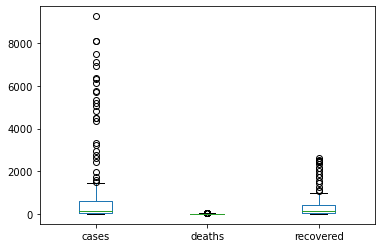

In [110]:
covid_Austria_df.plot.box() # distribution of the data

<AxesSubplot:xlabel='Time'>

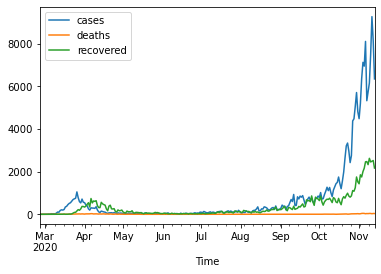

In [111]:
covid_Austria_df.plot() # simple plot

### Analysis and plots

In [112]:
# get the total numbers (cumulative sum)
covid_Austria_df["total recovered"] = covid_Austria_df["recovered"].cumsum()
covid_Austria_df["total deaths"] = covid_Austria_df["deaths"].cumsum()
covid_Austria_df["total cases"] = covid_Austria_df["cases"].cumsum()
covid_Austria_df

cases  deaths  recovered  total recovered  total deaths  \
Time                                                                  
2020-02-26      1       0          0                0             0   
2020-02-27      2       0          0                0             0   
2020-02-28      4       0          0                0             0   
2020-02-29      1       0          0                0             0   
2020-03-01      4       0          0                0             0   
...           ...     ...        ...              ...           ...   
2020-11-09   6148      41       2623            80468          1486   
2020-11-10   7476      40       2453            82921          1526   
2020-11-11   9261      28       2485            85406          1554   
2020-11-12   8124      39       2521            87927          1593   
2020-11-13   6341      36       2167            90094          1629   

            total cases  
Time                     
2020-02-26            1  
2020-02-27            3  
2020-02-28            7  
2020-02-29            8  
2020-03-01           12  
...                 ...  
2020-11-09       167014  
2020-11-10       174490  
2020-11-11       183751  
2020-11-12       191875  
2020-11-13       198216  

[262 rows x 6 columns]

In [113]:
covid_Austria_df["total infected"] = covid_Austria_df["total cases"] - covid_Austria_df["total recovered"] - covid_Austria_df["total deaths"]
covid_Austria_df

cases  deaths  recovered  total recovered  total deaths  \
Time                                                                  
2020-02-26      1       0          0                0             0   
2020-02-27      2       0          0                0             0   
2020-02-28      4       0          0                0             0   
2020-02-29      1       0          0                0             0   
2020-03-01      4       0          0                0             0   
...           ...     ...        ...              ...           ...   
2020-11-09   6148      41       2623            80468          1486   
2020-11-10   7476      40       2453            82921          1526   
2020-11-11   9261      28       2485            85406          1554   
2020-11-12   8124      39       2521            87927          1593   
2020-11-13   6341      36       2167            90094          1629   

            total cases  total infected  
Time                                     
2020-02-26            1               1  
2020-02-27            3               3  
2020-02-28            7               7  
2020-02-29            8               8  
2020-03-01           12              12  
...                 ...             ...  
2020-11-09       167014           85060  
2020-11-10       174490           90043  
2020-11-11       183751           96791  
2020-11-12       191875          102355  
2020-11-13       198216          106493  

[262 rows x 7 columns]

<AxesSubplot:xlabel='Time'>

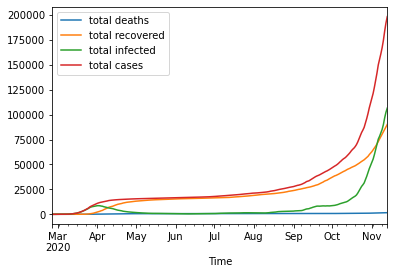

In [114]:
covid_Austria_df.plot(y=["total deaths", "total recovered", "total infected", "total cases"])

### area

<AxesSubplot:xlabel='Time'>

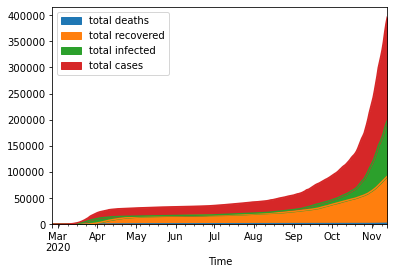

In [115]:
covid_Austria_df.plot.area(y=["total deaths", "total recovered", "total infected", "total cases"])

### scatter

<AxesSubplot:xlabel='cases', ylabel='deaths'>

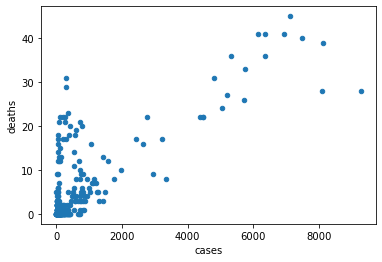

In [116]:
covid_Austria_df.plot.scatter(x="cases", y="deaths")

<AxesSubplot:xlabel='Time', ylabel='total recovered'>

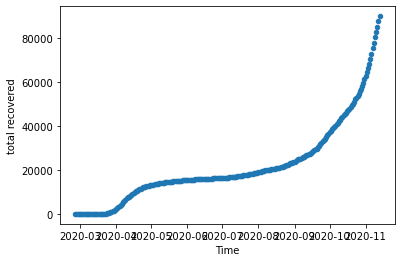

In [117]:
covid_Austria_df.reset_index().plot.scatter(x="Time", y="total recovered")
#covid_Austria_df.plot.scatter(x='Time', y="total recovered")

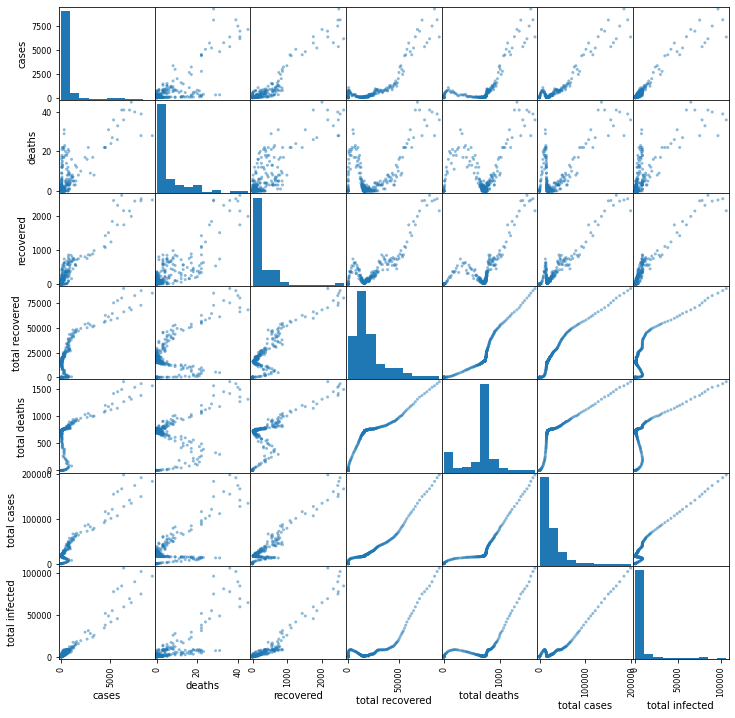

In [118]:
from pandas.plotting import scatter_matrix
scatter_matrix(covid_Austria_df, figsize=(12,12))
plt.show()

### histogram

<AxesSubplot:ylabel='Frequency'>

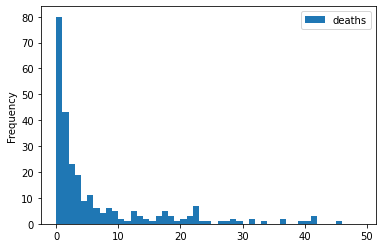

In [119]:
covid_Austria_df.plot.hist(y=["deaths"], bins=range(50))

### box plot

<AxesSubplot:>

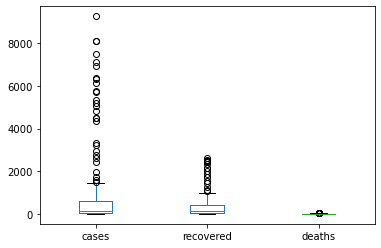

In [120]:
covid_Austria_df.plot.box(y=["cases", "recovered", "deaths"])

### bar

In [121]:
# cases by age group (new data frame)
age_groups_df = pd.read_csv('data/CovidFaelle_Altersgruppe.csv', sep=';')
age_groups_df

AltersgruppeID Altersgruppe        Bundesland  BundeslandID  \
0                 1           <5        Burgenland             1   
1                 1           <5        Burgenland             1   
2                 1           <5           Kärnten             2   
3                 1           <5           Kärnten             2   
4                 1           <5  Niederösterreich             3   
..              ...          ...               ...           ...   
195              10          >84        Vorarlberg             8   
196              10          >84              Wien             9   
197              10          >84              Wien             9   
198              10          >84        Österreich            10   
199              10          >84        Österreich            10   

     AnzEinwohner Geschlecht  Anzahl  AnzahlGeheilt  AnzahlTot  
0            6271          M      21             14          0  
1            5908          W      10              8          0  
2           12224          M      31             14          0  
3           11683          W      34              9          0  
4           40492          M      84             47          0  
..            ...        ...     ...            ...        ...  
195          6109          W     116             41         15  
196         11844          M     289             82         61  
197         27218          W     705            172        123  
198         74325          M    1805            481        308  
199        152000          W    3942           1195        406  

[200 rows x 9 columns]

In [122]:
age_groups_df = age_groups_df[age_groups_df["Bundesland"] == "Österreich"] # filter out the numbers for the whole country 
age_groups_df.head()

AltersgruppeID Altersgruppe  Bundesland  BundeslandID  AnzEinwohner  \
18               1           <5  Österreich            10        224096   
19               1           <5  Österreich            10        211739   
38               2         5-14  Österreich            10        435590   
39               2         5-14  Österreich            10        411635   
58               3        15-24  Österreich            10        491758   

   Geschlecht  Anzahl  AnzahlGeheilt  AnzahlTot  
18          M     950            571          0  
19          W     818            476          0  
38          M    5747           3093          0  
39          W    5325           2791          0  
58          M   16748           8846          0

In [123]:
age_groups_df = age_groups_df.drop(['AltersgruppeID', 'Bundesland', 'BundeslandID'], axis = 1)
age_groups_df.columns = ['age', 'population', 'gender', 'cases', 'recovered', 'deaths']
age_groups_df

age  population gender  cases  recovered  deaths
18      <5      224096      M    950        571       0
19      <5      211739      W    818        476       0
38    5-14      435590      M   5747       3093       0
39    5-14      411635      W   5325       2791       0
58   15-24      491758      M  16748       8846       0
59   15-24      463867      W  14907       7650       0
78   25-34      617223      M  17796       8750       1
79   25-34      591807      W  16396       7562       1
98   35-44      590628      M  14225       6743       7
99   35-44      584117      W  14669       6683       1
118  45-54      665454      M  16851       7923      16
119  45-54      668403      W  18200       8139      14
138  55-64      618087      M  13943       6279      54
139  55-64      633033      W  12708       5557       9
158  65-74      393151      M   6819       2844     172
159  65-74      448884      W   6366       2668      68
178  75-84      268460      M   4737       1645     356
179  75-84      356807      W   5266       1945     221
198    >84       74325      M   1805        481     308
199    >84      152000      W   3942       1195     406

In [124]:
# group by age
ages_df = age_groups_df.groupby("age", sort=False).sum()
ages_df


population  cases  recovered  deaths
age                                        
<5         435835   1768       1047       0
5-14       847225  11072       5884       0
15-24      955625  31655      16496       0
25-34     1209030  34192      16312       2
35-44     1174745  28894      13426       8
45-54     1333857  35051      16062      30
55-64     1251120  26651      11836      63
65-74      842035  13185       5512     240
75-84      625267  10003       3590     577
>84        226325   5747       1676     714

<AxesSubplot:xlabel='age'>

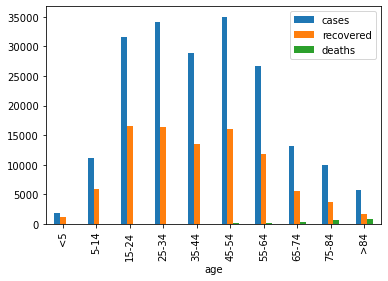

In [125]:
ages_df.plot.bar(y=["cases","recovered","deaths"])

In [126]:
#normalized (per capita)
for k in ["cases","recovered","deaths"]:
    ages_df[k+'_n'] = 1000 * ages_df[k] / ages_df.population # in promille
ages_df

population  cases  recovered  deaths    cases_n  recovered_n  deaths_n
age                                                                          
<5         435835   1768       1047       0   4.056581     2.402285  0.000000
5-14       847225  11072       5884       0  13.068547     6.945026  0.000000
15-24      955625  31655      16496       0  33.124918    17.262001  0.000000
25-34     1209030  34192      16312       2  28.280522    13.491807  0.001654
35-44     1174745  28894      13426       8  24.595976    11.428863  0.006810
45-54     1333857  35051      16062      30  26.277929    12.041771  0.022491
55-64     1251120  26651      11836      63  21.301714     9.460324  0.050355
65-74      842035  13185       5512     240  15.658494     6.546046  0.285024
75-84      625267  10003       3590     577  15.997966     5.741547  0.922806
>84        226325   5747       1676     714  25.392688     7.405280  3.154755

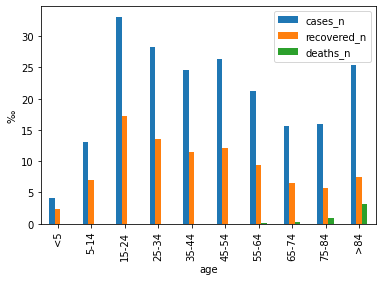

In [127]:
ages_df.plot.bar(y=["cases_n", "recovered_n", "deaths_n"])
_=plt.ylabel('‰')

### pie

In [128]:
# group by gender
gender_df = age_groups_df.groupby("gender", sort=False).sum()
gender_df

population  cases  recovered  deaths
gender                                      
M          4378772  99621      47175     914
W          4522292  98597      44666     720

array([<AxesSubplot:ylabel='cases'>], dtype=object)

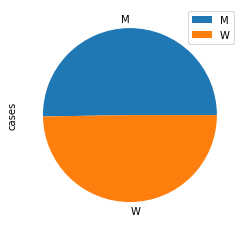

In [129]:
gender_df.plot.pie(y="cases", subplots=True)

#### combine pandas and subplots

<AxesSubplot:xlabel='age'>

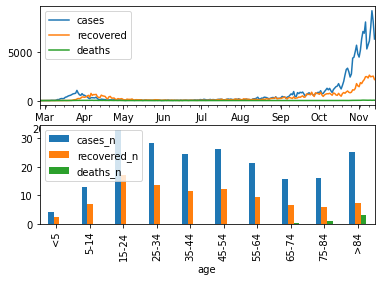

In [130]:
fig, axes = plt.subplots(2, 1)
covid_Austria_df.plot(y=["cases", "recovered", "deaths"], ax=axes[0]) # give the axis to the plot as an argument
ages_df.plot.bar(y=["cases_n", "recovered_n", "deaths_n"], ax=axes[1])

### Pul all together

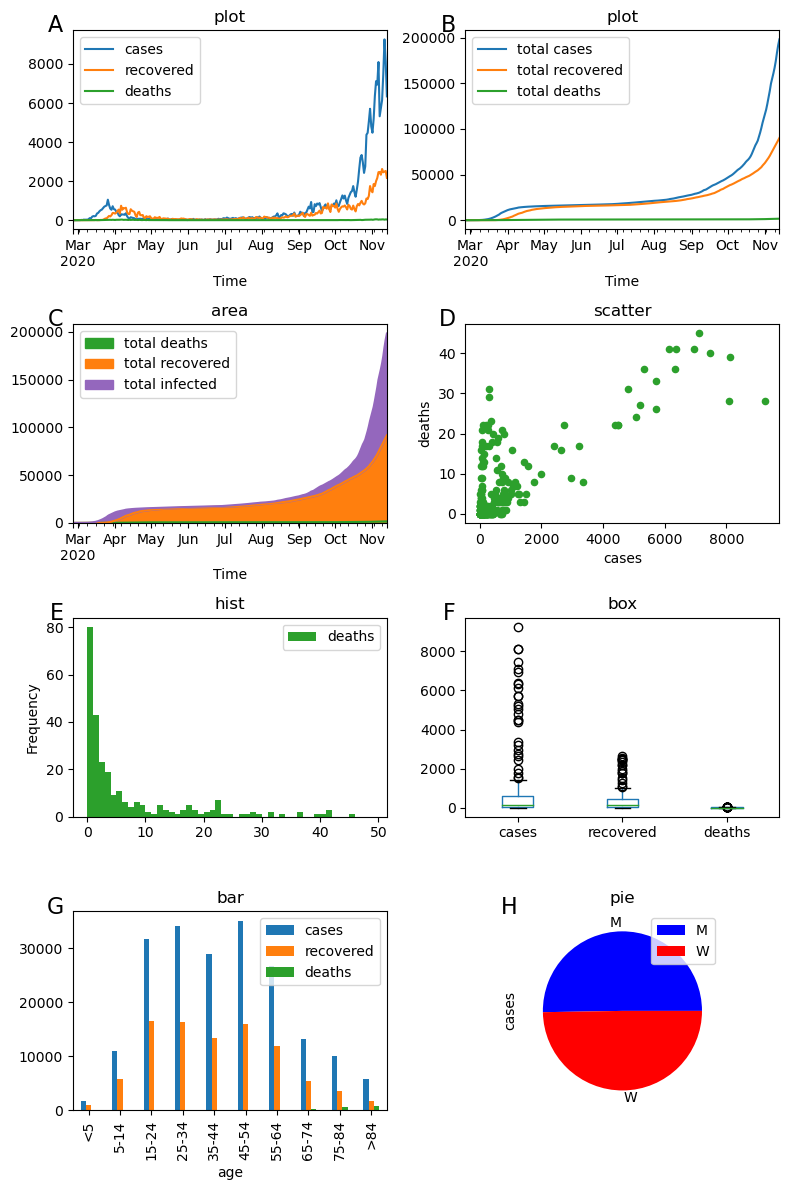

In [131]:

nrows, ncols = 4, 2
fig, axes = plt.subplots(nrows, ncols, figsize=(8, 12), dpi=100)

covid_Austria_df.plot(y=["cases", "recovered", "deaths"], ax=axes[0][0])
covid_Austria_df.plot(y=["total cases", "total recovered", "total deaths"], ax=axes[0][1])
covid_Austria_df.plot.area(y=["total deaths", "total recovered", "total infected"], color=["C2","C1","C4"], ax=axes[1][0])
covid_Austria_df.plot.scatter(x="cases", y="deaths", color="C2", ax=axes[1][1])
covid_Austria_df.plot.hist(y=["deaths"], bins=range(50), color="C2", ax=axes[2][0])
covid_Austria_df.plot.box(y=["cases", "recovered", "deaths"], ax=axes[2][1])
ages_df.plot.bar(y=["cases", "recovered", "deaths"], ax=axes[3][0])
gender_df.plot.pie(y="cases", subplots=True, colors=["blue","red"], ax=axes[3][1])

import string
letters = string.ascii_letters.upper()

plot_type = ["plot", "plot", "area", "scatter", "hist", "box", "bar", "pie"]

idx = 0 
for r in range(nrows):
    for c in range(ncols):
        axes[r][c].set_title(plot_type[idx])
        axes[r][c].text(-0.03, 1.08, letters[idx], transform=axes[r][c].transAxes,fontsize=16, va='top', ha='right')
        idx+=1


plt.tight_layout()
plt.show()

### additional considerations

`describe` Generate descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding `NaN` values.

In [132]:
covid_Austria_df.describe()

cases      deaths    recovered  total recovered  total deaths  \
count   262.000000  262.000000   262.000000       262.000000    262.000000   
mean    756.549618    6.217557   343.870229     21787.492366    665.389313   
std    1605.862737    9.535294   517.532288     18369.313016    323.209695   
min       1.000000    0.000000     0.000000         0.000000      0.000000   
25%      52.000000    0.000000    46.250000     13189.750000    639.500000   
50%     152.000000    2.000000   137.000000     16555.000000    732.000000   
75%     612.750000    8.000000   426.000000     26020.000000    763.000000   
max    9261.000000   45.000000  2623.000000     90094.000000   1629.000000   

         total cases  total infected  
count     262.000000      262.000000  
mean    30914.011450     8461.129771  
std     35117.759477    17975.583553  
min         1.000000        1.000000  
25%     15566.000000      913.750000  
50%     18313.500000     2009.500000  
75%     31087.750000     7648.750000  
max    198216.000000   106493.000000

In [133]:
# with numpy you need special functions to deal with NaNs
import numpy as np
x = np.array([1, 2, np.nan])
print(np.mean(x))
print(np.nanmean(x))

nan
1.5


In [134]:
# with pandas is not neccesary
p = pd.DataFrame(x)
print(p.mean())

0    1.5
dtype: float64


In [135]:
# check for NaN values
p.isnull()

0
0  False
1  False
2   True

In [136]:
# how many NaN values
p.isnull().sum()

0    1
dtype: int64

In [137]:
print("mean\t", covid_Austria_df['cases'].mean())
print("std\t", covid_Austria_df['cases'].std())
print("min\t", covid_Austria_df['cases'].min())
print("max\t", covid_Austria_df['cases'].max())
print("q30\t", covid_Austria_df['cases'].quantile(q=0.30))
print("median\t", covid_Austria_df['cases'].median())
print("count\t", covid_Austria_df['cases'].count())

mean	 756.5496183206106
std	 1605.862736883977
min	 1
max	 9261
q30	 62.3
median	 152.0
count	 262


# THE END